In [1]:
from fastqaoa.indicator import get_indicator_interpolator, interpolate_diagonals

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import os; os.chdir("eval/")
import quantum_plots as qp
qp.global_setup(fontsize=11)
os.chdir("..");

In [16]:
interp = get_indicator_interpolator(M=4, subdiv=4, shift=0)

In [17]:
Nx = 400
Ny = 400


g = np.linspace(-1, 1, Nx)
th = interp(g)
yf = np.linspace(-np.pi, np.pi, Ny)

func = lambda yf, th: (np.exp(1j * yf[:, None]) + 1) * 0.5 + 0.5 *(np.exp(1j * yf[:, None]) - 1) * th[None, :]

x = func(yf, th)

Text(0, 0.5, '$\\gamma f(x)$')

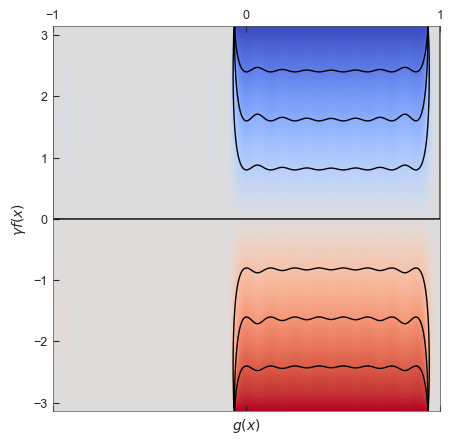

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(np.angle(x), extent=[g[0], g[-1], yf[0], yf[-1]], cmap=sns.color_palette("coolwarm", as_cmap=True), aspect="auto")
ax.contour(np.angle(x), extent=[g[0], g[-1], yf[0], yf[-1]], colors="black", linestyles="-")
ax.set_xlabel(r"$g(x)$")
ax.set_ylabel(r"$\gamma f(x)$")

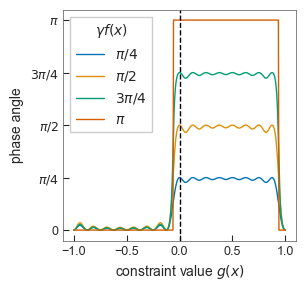

In [30]:
plt.subplots(figsize=(3, 3))

yf2 = np.array([1, 2, 3, 4]) / 4 * np.pi
yfn = [r"$\pi / 4$", r"$\pi / 2$", r"$3 \pi / 4$", r"$\pi$"]
x2 = func(yf2, th)

v = [{"angle": np.angle(xii), "prob": np.abs(xii) ** 2, "yf": yfi, "g": gi, "yfn": yfni} for xi, yfi, yfni in zip(x2, yf2, yfn) for xii, gi in zip(xi, g)]
df = pd.DataFrame(v)

sns.lineplot(df, x="g", y="angle", hue="yfn", legend=True, palette="colorblind")
plt.gca().get_legend().set_title(r"$\gamma f(x)$")

plt.ylabel(r"phase angle")
plt.xlabel("constraint value $g(x)$")
plt.xticks(np.linspace(-1, 1, 5))
plt.yticks(np.linspace(0, np.pi, 5), [0, r"$\pi / 4$", r"$\pi / 2$",  r"$3\pi / 4$", r"$\pi$"])

plt.axvline(0, color="k", linestyle="dashed")

fig.tight_layout()

plt.savefig("if_phase.pdf", bbox_inches="tight", transparent=True)

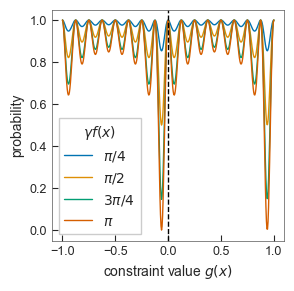

In [31]:
plt.subplots(figsize=(3, 3))
sns.lineplot(df, x="g", y="prob", hue="yfn", legend=True, palette="colorblind")
plt.gca().get_legend().set_title(r"$\gamma f(x)$")

plt.ylabel(r"probability")
plt.xlabel("constraint value $g(x)$")
plt.xticks(np.linspace(-1, 1, 5))

plt.axvline(0, color="k", linestyle="dashed")

fig.tight_layout()


plt.savefig("if_prob.pdf", bbox_inches="tight", transparent=True)

In [32]:
import networkx as nx

In [68]:
data = []

for s in range(10, 100, 10):
    for r in range(50):
        data.append({"connected": nx.is_connected(nx.erdos_renyi_graph(s, 1/s)), "r": r, "s": s})

xx = pd.DataFrame(data)

xx.connected.sum()

0

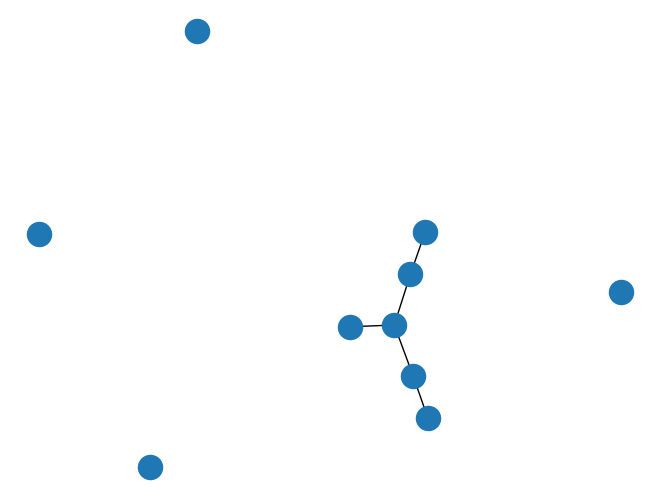

In [97]:
nx.draw(nx.erdos_renyi_graph(10, 1/10))